In [ ]:
import gzip
import json
import matplotlib.pyplot as plt
from collections import Counter
import math
import statistics
import random
import numpy as np

In [ ]:
# Load the data line by line to save memory
def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield json.loads(l)

# Prefiltering

## Review data overview

In [ ]:
# A dictionary with the key being item id and value being the number of review for that item
items = {}

# Go through the
for review in parse("/content/drive/MyDrive/D3M Summer Intern 2023/Data/clothing/Clothing_Shoes_and_Jewelry.json.gz"):
    if(review['asin'] in items):
        items[review['asin']] += 1
    else:
        items[review['asin']] = 1

In [ ]:
# Find average
total = sum(items.values())
count = len(items)

mean = total/count
print("Average is:", mean)

Average is: 12.043462175208491


In [ ]:
# Find median

# Create a list containing all the values
values = sorted(items.values())
middle_index = len(values) // 2

if len(values) % 2 == 0:
    # If length is an even number pick the middle two and find average
    median = (values[middle_index - 1] + values[middle_index]) / 2
else:
    median = values[middle_index]

print("Median is:", median)

Median is: 2


In [ ]:
# Find standard deviation
variance = sum((x - mean) ** 2 for x in items.values()) / len(items)
std_dev = math.sqrt(variance)
print("Standard deviation is:", std_dev)

Standard deviation is: 88.16618594637345


In [ ]:
# Find mode
mode_val = statistics.mode(items.values())
print("Mode is", mode_val)

Mode is 1


In [ ]:
# Find the percentile of items
counter = 0
bound = 5

for value in items.values():
    if(value<bound):
        counter += 1

percentage = (counter / len(items)) * 100

print("The percentage of items with more than "+str(bound)+" reviews are: "+ str(round(percentage, 5)) + "%")

The percentage of items with more than 5 reviews are: 72.48265%


## Relation between attributes

In [ ]:
rating = {}

for review in parse("/content/drive/MyDrive/D3M Summer Intern 2023/Data/clothing/Clothing_Shoes_and_Jewelry.json.gz"):
    user_rating = review['overall'] # This is the rating user gave in this review
    if(review['asin'] in rating):
        rating[review['asin']] += user_rating
    else:
        rating[review['asin']] = user_rating

In [ ]:
rating_review_count = {}

for key, value in items.items():
    average_rating = rating[key]/items[key]
    rating_review_count[key] = [average_rating, items[key]]

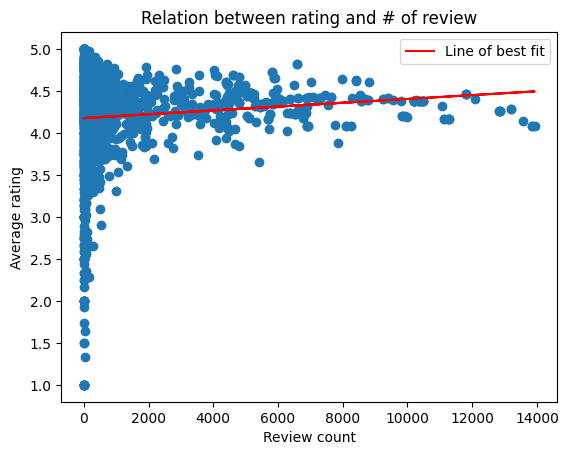

The average rating of items below 20 reviews is: 4.113238796437411
The average rating of items above 20 reviews is: 4.1629846831313655


In [ ]:
x = []
y = []

rating_below_5 = []
rating_above_5 = []

for value in rating_review_count.values():
    if(value[1]>15000):
        # remove outliers
        continue

    if(value[1]>5):
        rating_above_5.append(value[0])
    else:
        rating_below_5.append(value[0])

    if(value[1]>4000):
        x.append(value[1])
        y.append(value[0])

    random_integer = random.randint(0, 20000)
    if(value[1]>random_integer):
        x.append(value[1])
        y.append(value[0])

plt.scatter(x, y)
plt.xlabel("Review count")
plt.ylabel("Average rating")
plt.title("Relation between rating and # of review")
coefficients = np.polyfit(x, y, 1)
polynomial = np.poly1d(coefficients)
plt.plot(x, polynomial(x), 'r', label = "Line of best fit")
plt.legend()
plt.show()

print("The average rating of items below 20 reviews is:", sum(rating_below_5)/len(rating_below_5))
print("The average rating of items above 20 reviews is:", sum(rating_above_5)/len(rating_above_5))

In [ ]:
rating_review = {}

for key in rating_review_count.keys():
    average_rating, review_num = rating_review_count[key]
    if(review_num not in rating_review):
        rating_review[review_num] = [average_rating]
    else:
        rating_review[review_num].append(average_rating)

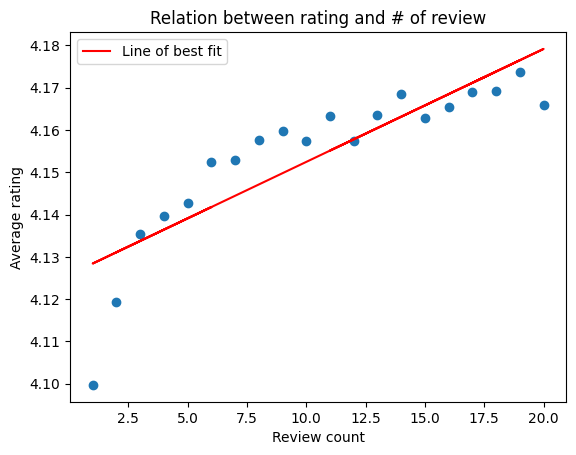

In [ ]:
x = []
y = []

for key, value in rating_review.items():
    if(key>20):
        continue
    if(len(value)<100):
        continue
    x.append(key)
    y.append(sum(value)/len(value))

plt.scatter(x, y)
plt.xlabel("Review count")
plt.ylabel("Average rating")
plt.title("Relation between rating and # of review")
coefficients = np.polyfit(x, y, 1)
polynomial = np.poly1d(coefficients)
plt.plot(x, polynomial(x), 'r', label = "Line of best fit")
plt.legend()
plt.show()

## Histogram

In [ ]:
# Counter of review counts
counts = Counter(items.values())

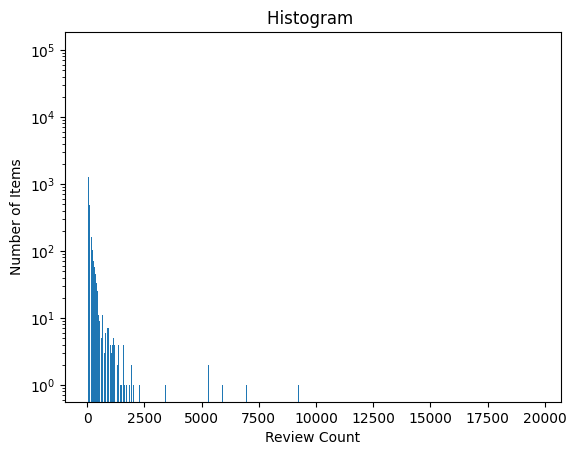

In [ ]:
keys = counts.keys()
values = counts.values()

plt.bar(keys, values)
plt.xlabel('Review Count')
plt.ylabel('Number of Items')
plt.title('Histogram ')
plt.yscale('log')
plt.show()

# Post filtering

In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/D3M Summer Intern 2023/Data/clothing/all-preprocessed-data/processed_top_all_meta_Clothing_Shoes_and_Jewelry.csv")

items = {}
rating = {}

for i in range(df.shape[0]):
    items[df['item_id'][i]] = df['num_reviews'][i]
    rating[df['item_id'][i]] = df['rating'][i]

In [ ]:
# Find average
total = sum(items.values())
count = len(items)

mean = total/count
print("Average is:", mean)

Average is: 24.39845004931661


In [ ]:
# Find median

# Create a list containing all the values
values = sorted(items.values())
middle_index = len(values) // 2

if len(values) % 2 == 0:
    # If length is an even number pick the middle two and find average
    median = (values[middle_index - 1] + values[middle_index]) / 2
else:
    median = values[middle_index]

print("Median is:", median)

Median is: 9


In [ ]:
# Find standard deviation
variance = sum((x - mean) ** 2 for x in items.values()) / len(items)
std_dev = math.sqrt(variance)
print("Standard deviation is:", std_dev)

Standard deviation is: 58.30463242707626


In [ ]:
# Find mode
mode_val = statistics.mode(items.values())
print("Mode is", mode_val)

Mode is 4


In [ ]:
# Find the percentile of items
counter = 0
bound = 100

for value in items.values():
    if(value>bound):
        counter += 1

percentage = (counter / len(items)) * 100

print("The percentage of items with more than "+str(bound)+" reviews are: "+ str(round(percentage, 5)) + "%")

The percentage of items with more than 100 reviews are: 4.18205%


In [ ]:
rating_review_count = {}

for key, value in items.items():
    average_rating = rating[key]
    rating_review_count[key] = [average_rating, items[key]]

In [ ]:
rating_review = {}

for key in rating_review_count.keys():
    average_rating, review_num = rating_review_count[key]
    if(review_num not in rating_review):
        rating_review[review_num] = [average_rating]
    else:
        rating_review[review_num].append(average_rating)

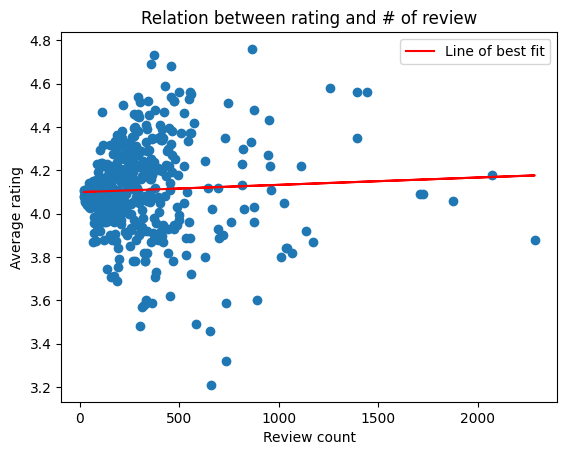

In [ ]:
x = []
y = []

for key, value in rating_review.items():
    if(key<20):
        continue
    # if(len(value)<200):
    #     continue
    x.append(key)
    y.append(sum(value)/len(value))

plt.scatter(x, y)
plt.xlabel("Review count")
plt.ylabel("Average rating")
plt.title("Relation between rating and # of review")
coefficients = np.polyfit(x, y, 1)
polynomial = np.poly1d(coefficients)
plt.plot(x, polynomial(x), 'r', label = "Line of best fit")
plt.legend()
plt.show()

## Histogram

In [ ]:
# Counter of review counts
counts = Counter(items.values())

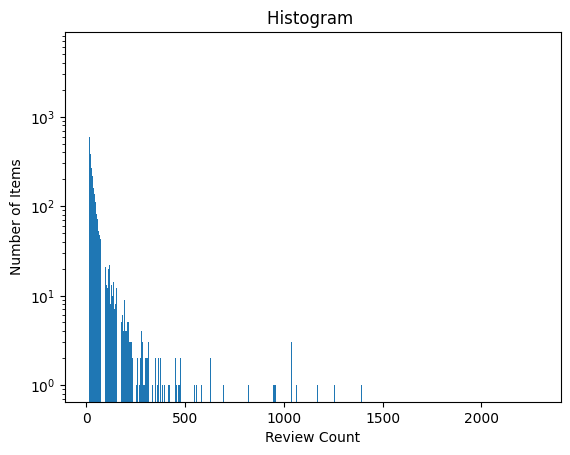

In [ ]:
keys = counts.keys()
values = counts.values()

plt.bar(keys, values)
plt.xlabel('Review Count')
plt.ylabel('Number of Items')
plt.title('Histogram ')
plt.yscale('log')
plt.show()